# **IMPORTING THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
import warnings
import tensorflow
warnings.filterwarnings('ignore')

# **DOWNLOADING AND EXTRACTING THE DATASET**

In [ ]:
# Download dataset
! wget https://www.utwente.nl/en/eemcs/ps/dataset-folder/sensors-activity-recognition-dataset-shoaib.rar -P ../data/

# Extract dataset using unrar
!pip install unrar
!unrar e ../data/sensors-activity-recognition-dataset-shoaib.rar ../data/

--2021-11-19 02:50:55--  https://www.utwente.nl/en/eemcs/ps/dataset-folder/sensors-activity-recognition-dataset-shoaib.rar
Resolving www.utwente.nl (www.utwente.nl)... 130.89.3.249, 2001:67c:2564:a102::1:1
Connecting to www.utwente.nl (www.utwente.nl)|130.89.3.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100080442 (95M) [application/x-rar-compressed]
Saving to: ‘../data/sensors-activity-recognition-dataset-shoaib.rar’

sensors-activity-re 100%[===================>]  95.44M  27.4MB/s    in 3.8s    

2021-11-19 02:51:00 (25.0 MB/s) - ‘../data/sensors-activity-recognition-dataset-shoaib.rar’ saved [100080442/100080442]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ../data/sensors-activity-recognition-dataset-shoaib.rar

Extracting  ../data/Participant_1.csv                                      0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10%  OK 
Extracting  ../data/Particip

# **LOADING THE DATASET**

In [ ]:
df = pd.DataFrame()
for i in range(10):
    df_tmp = pd.read_csv('../data/Participant_' + str(i+1) + '.csv', header=1)
    df = pd.concat([df, df_tmp])
df_copy=df.copy()
# View top 5 rows of dataframe
df.head(5)

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Unnamed: 13,time_stamp.1,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Unnamed: 27,time_stamp.2,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Unnamed: 41,time_stamp.3,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Unnamed: 55,time_stamp.4,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,Unnamed: 69
0,1.390000e+12,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976,12.72,40.74,-6.00,NaN,1.390000e+12,-1.19860,-13.852,3.7865,-1.76980,-4.0625,3.89850,-3.6255,1.07390,0.13622,18.84,55.92,-6.72,NaN,1.390000e+12,0.17706,-10.569,1.8251,-7.5051,-4.7736,-0.062476,-0.36652,1.27060,-0.52412,-30.30,31.08,3.96,NaN,1.390000e+12,2.79220,-12.5720,-4.3177,-0.098712,-3.385700,-2.46480,0.021075,1.02990,1.22690,-18.72,31.74,17.82,NaN,1.390000e+12,4.3177,-2.36990,-0.43585,-5.3574,-0.95749,0.318860,0.52565,-0.18815,0.285880,-22.20,6.48,4.56,walking
1,1.390000e+12,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745,12.54,40.74,-6.78,NaN,1.390000e+12,-2.38360,-16.590,2.9965,-2.70250,-6.7890,2.86820,-3.4899,0.39034,0.40073,18.60,55.86,-6.06,NaN,1.390000e+12,0.16344,-12.190,2.0703,-7.3573,-6.2618,-0.042442,-0.54459,1.28070,0.34025,-31.02,29.88,3.36,NaN,1.390000e+12,2.38360,-10.9920,-4.6037,-0.404440,-1.774500,-2.74830,0.201890,0.53573,1.32280,-18.84,31.74,17.70,NaN,1.390000e+12,5.1213,-2.19290,-0.70826,-4.5352,-0.67629,0.081656,0.43616,0.16371,0.198230,-21.90,7.14,5.34,walking
2,1.390000e+12,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230,12.42,40.68,-8.10,NaN,1.390000e+12,-4.63090,-16.603,2.0703,-4.34550,-6.8081,1.68890,-3.3851,-1.99200,1.12280,18.72,55.80,-4.26,NaN,1.390000e+12,0.57205,-12.626,2.2474,-6.7655,-6.5138,0.017921,-0.70952,1.15820,0.99724,-31.26,29.22,3.24,NaN,1.390000e+12,1.56630,-9.0848,-4.5764,-1.003600,0.201530,-2.75150,0.287720,0.10049,1.20710,-19.02,31.68,17.52,NaN,1.390000e+12,5.6116,-2.12480,-1.26670,-4.0408,-0.55974,-0.523690,0.32284,0.43127,0.211970,-21.60,7.50,5.64,walking
3,1.390000e+12,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.34972,12.30,40.74,-8.52,NaN,1.390000e+12,-4.78070,-16.453,1.1577,-4.19540,-6.6731,0.74084,-3.1017,-3.04390,0.79138,18.84,55.62,-3.12,NaN,1.390000e+12,1.21220,-12.476,2.2882,-5.9716,-6.1990,0.016760,-0.78191,1.10200,1.33380,-31.44,28.80,3.24,NaN,1.390000e+12,-0.61292,-8.5263,-2.9284,-2.827100,0.859490,-1.14670,0.175930,-0.21441,0.90469,-18.96,31.86,17.22,NaN,1.390000e+12,6.0611,-1.47100,-2.47890,-3.5908,0.15795,-1.880200,0.20403,0.72846,0.164930,-21.12,8.40,6.12,walking
4,1.390000e+12,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.22724,12.24,40.80,-8.88,NaN,1.390000e+12,-0.92618,-12.190,-1.0624,-0.18116,-2.4144,-1.28500,-2.7587,-4.46020,0.69364,19.38,55.44,-0.84,NaN,1.390000e+12,2.24740,-11.387,1.9886,-4.6603,-4.8230,-0.329740,-0.82436,0.90561,2.15600,-31.56,28.32,3.30,NaN,1.390000e+12,-1.18500,-9.3436,-2.2337,-3.209900,0.085583,-0.45569,-0.033292,-0.48625,0.60720,-18.84,32.10,17.04,NaN,1.390000e+12,7.7091,-0.77636,-3.54130,-1.9450,0.85796,-2.995300,0.09896,0.94379,0.064752,-20.94,8.70,6.30,walking


# **BASIC INFO ABOUT THE DATASET**

In [ ]:
print("Shape of the Dataset:\n")
print("\tNo. of rows: ",df.shape[0])
print("\tNo. of columns: ",df.shape[1])

Shape of the Dataset:

	No. of rows:  630000
	No. of columns:  70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630000 entries, 0 to 62999
Data columns (total 70 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time_stamp    630000 non-null  float64
 1   Ax            630000 non-null  float64
 2   Ay            630000 non-null  float64
 3   Az            630000 non-null  float64
 4   Lx            630000 non-null  float64
 5   Ly            630000 non-null  float64
 6   Lz            630000 non-null  float64
 7   Gx            630000 non-null  float64
 8   Gy            630000 non-null  float64
 9   Gz            630000 non-null  float64
 10  Mx            630000 non-null  float64
 11  My            630000 non-null  float64
 12  Mz            630000 non-null  float64
 13  Unnamed: 13   0 non-null       float64
 14  time_stamp.1  630000 non-null  float64
 15  Ax.1          630000 non-null  float64
 16  Ay.1          630000 non-null  float64
 17  Az.1          630000 non-null  float64
 18  Lx.1 

In [ ]:
print("Statistical Info about the Dataset:\n")
df.describe()

Statistical Info about the Dataset:



,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Unnamed: 13,time_stamp.1,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Unnamed: 27,time_stamp.2,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Unnamed: 41,time_stamp.3,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Unnamed: 55,time_stamp.4,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4
count,6.300000e+05,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,0.0,6.300000e+05,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,0.0,6.300000e+05,630000.00000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,0.0,6.300000e+05,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,0.0,6.300000e+05,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,1.390000e+12,0.122884,-7.579559,-2.807124,-0.003061,-0.317290,0.185519,-0.018044,-0.017972,0.022830,-2.162985,24.695768,12.480322,NaN,1.390000e+12,1.190832,-7.597663,-2.813282,0.048338,-0.248393,0.058857,0.000257,0.045111,-0.025036,-6.319876,30.168607,6.811108,NaN,1.390000e+12,4.74549,-6.768818,-2.348493,0.413471,-0.864055,0.159176,-0.026471,0.021960,0.012470,-14.303741,21.051682,10.324533,NaN,1.390000e+12,1.561038,-8.592460,-2.057916,-0.035515,0.033093,0.101860,0.001122,-0.012288,0.010871,-6.592316,34.427760,7.700906,NaN,1.390000e+12,7.230630,-0.895497,-1.009112,0.030635,0.025624,0.032854,0.021933,0.005916,0.016573,-24.249241,4.462356,6.862067
std,0.000000e+00,3.775908,5.684442,4.587958,2.720073,4.219639,3.105666,1.623147,1.456254,0.756521,21.841140,19.559994,18.953307,NaN,0.000000e+00,4.142713,5.478591,4.198057,2.926713,4.080694,2.895513,1.405593,1.254264,0.961677,21.481921,19.561070,20.642661,NaN,0.000000e+00,4.24340,5.160875,3.718551,4.339708,3.926136,2.635841,0.967513,0.985038,1.385462,20.509353,20.136361,22.677330,NaN,0.000000e+00,3.820308,3.659136,2.417609,2.475000,3.562783,1.866068,0.496952,1.122924,0.885703,20.681454,8.904011,15.672863,NaN,0.000000e+00,6.546681,3.018312,3.215342,3.659390,1.768752,1.805900,0.931477,0.940449,0.425748,58.046088,36.094230,51.834489
min,1.390000e+12,-19.477000,-19.668000,-19.409000,-24.473000,-21.387000,-26.779000,-9.221300,-9.998600,-9.461400,-81.780000,-31.200000,-58.500000,NaN,1.390000e+12,-19.300000,-19.600000,-19.491000,-22.918000,-16.452000,-27.444000,-7.747900,-9.944300,-7.596400,-89.940000,-39.840000,-59.040000,NaN,1.390000e+12,-19.47700,-19.600000,-19.041000,-23.789000,-29.287000,-20.239000,-7.280000,-9.963500,-7.791000,-116.880000,-86.220000,-136.500000,NaN,1.390000e+12,-19.518000,-19.600000,-19.395000,-28.576000,-21.138000,-22.537000,-4.368600,-9.899700,-6.559800,-70.020000,-16.020000,-41.640000,NaN,1.390000e+12,-19.600000,-19.368000,-16.658000,-25.645000,-18.511000,-23.580000,-8.808700,-9.967200,-4.911400,-300.480000,-82.680000,-108.300000
25%,1.390000e+12,-1.416500,-10.447000,-6.633100,-0.795360,-1.554300,-0.611853,-0.696690,-0.546110,-0.265730,-17.460000,12.660000,-1.500000,NaN,1.390000e+12,-1.471000,-10.283000,-6.129200,-0.718215,-1.418200,-0.639202,-0.511910,-0.320400,-0.351250,-19.860000,22.680000,-9.900000,NaN,1.390000e+12,2.54700,-9.697700,-4.576400,-1.092225,-2.127800,-0.735670,-0.257480,-0.280390,-0.363460,-27.960000,4.920000,-8.100000,NaN,1.390000e+12,-0.108960,-9.575100,-3.159900,-0.774690,-0.676210,-0.271080,-0.178680,-0.329335,-0.189670,-22.140000,29.160000,-5.880000,NaN,1.390000e+12,6.469700,-2.410800,-3.064600,-0.994882,-0.405230,-0.454675,-0.253510,-0.241900,-0.142940,

### We have the data for the sensors when placed at five positions as discussed above but in our project we have considered only the phone positon placed in the right and left jean pockets. So we drop other features

In [ ]:
df=df.iloc[:,0:27]

In [ ]:
#Rename output feature name from Unnamed:69 to Activity
df['Activity']=df_copy['Unnamed: 69']

In [ ]:
#Modified Dataset
df.head(60)

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Unnamed: 13,time_stamp.1,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Activity
0,1.390000e+12,-1.811500,-14.87300,-1.348400,-1.269100,-5.10570,-0.66445,-0.53206,-3.186900,0.239760,12.72,40.74,-6.00,NaN,1.390000e+12,-1.198600,-13.8520,3.78650,-1.76980,-4.062500,3.898500,-3.625500,1.073900,0.136220,18.84,55.92,-6.72,walking
1,1.390000e+12,0.245170,-14.07000,-0.844460,0.701470,-4.29690,-0.17199,-0.25229,-1.796600,0.407450,12.54,40.74,-6.78,NaN,1.390000e+12,-2.383600,-16.5900,2.99650,-2.70250,-6.789000,2.868200,-3.489900,0.390340,0.400730,18.60,55.86,-6.06,walking
2,1.390000e+12,-0.572050,-14.62800,-1.757000,-0.217600,-4.85310,-1.05650,-1.04920,0.291380,0.292300,12.42,40.68,-8.10,NaN,1.390000e+12,-4.630900,-16.6030,2.07030,-4.34550,-6.808100,1.688900,-3.385100,-1.992000,1.122800,18.72,55.80,-4.26,walking
3,1.390000e+12,-0.694640,-12.93900,-3.091800,-0.322730,-3.17860,-2.21970,-2.37200,1.008200,0.349720,12.30,40.74,-8.52,NaN,1.390000e+12,-4.780700,-16.4530,1.15770,-4.19540,-6.673100,0.740840,-3.101700,-3.043900,0.791380,18.84,55.62,-3.12,walking
4,1.390000e+12,0.871700,-12.00000,-1.566300,1.137400,-2.23900,-0.65476,-2.79010,0.654850,0.227240,12.24,40.80,-8.88,NaN,1.390000e+12,-0.926180,-12.1900,-1.06240,-0.18116,-2.414400,-1.285000,-2.758700,-4.460200,0.693640,19.38,55.44,-0.84,walking
5,1.390000e+12,0.204310,-11.46800,4.344900,0.361360,-1.66690,4.62450,-3.05040,0.903160,0.232130,11.94,41.16,-8.82,NaN,1.390000e+12,1.607200,-12.0130,-3.21440,2.17230,-2.222800,-3.187100,-1.714400,-4.288000,0.348500,19.80,55.08,0.18,walking
6,1.390000e+12,0.503950,-12.50300,4.317700,0.604180,-2.69780,4.21970,-2.78710,0.206170,0.299630,11.94,41.28,-8.40,NaN,1.390000e+12,3.105400,-11.6730,-1.70250,3.39570,-1.871400,-1.553400,-2.398300,-2.071100,-0.188150,20.34,54.60,1.32,walking
7,1.390000e+12,2.601500,-16.08600,3.418700,2.485400,-6.28600,3.06610,-2.53880,-0.020464,-0.386070,11.88,41.46,-7.98,NaN,1.390000e+12,4.358500,-5.8159,4.03160,5.39550,0.992470,3.274400,-2.511900,-1.628600,-0.179900,20.76,54.30,2.46,walking
8,1.390000e+12,4.944200,-17.87000,2.083900,4.227700,-8.10640,1.50830,-2.58300,1.696400,-1.033000,12.00,41.82,-6.30,NaN,1.390000e+12,2.710400,-4.0452,3.89540,2.00990,5.707700,3.147200,-2.615400,-2.937300,0.424860,22.26,53.58,4.80,walking
9,1.390000e+12,4.699000,-15.96300,2.220100,3.735600,-6.22650,1.55580,-2.61790,2.955700,-1.229400,11.94,42.06,-5.16,NaN,1.390000e+12,1.225800,-3.1599,4.15420,0.43677,6.552500,3.051200,-2.302700,-2.779100,0.651790,22.92,53.10,6.00,walking


# **EDA**

In [ ]:
df['Activity'].value_counts(normalize=True)

standing      0.142857
jogging       0.142857
sitting       0.142857
walking       0.142857
downstairs    0.142857
biking        0.142857
upstairs      0.128571
upsatirs      0.014286
Name: Activity, dtype: float64

### We could see that the upstairs activity has been misspelled as upsatirs, so we rename that

In [ ]:
df['Activity']=df['Activity'].str.replace('upsatirs','upstairs')

In [ ]:
#Total number of activities available
df['Activity'].nunique()

7

[]

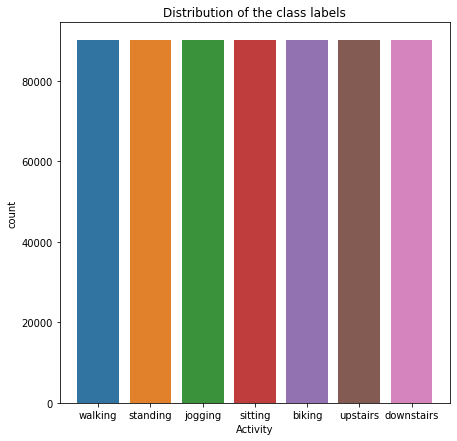

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Distribution of the class labels')
sns.countplot(df.Activity)
plt.plot()

# **SPLITTING THE DATA CLASS WISE**

In [ ]:
activities=list(df['Activity'].unique())
classwiselist=[]
for i in activities:
  classwiselist.append(df[df['Activity']==i])

In [ ]:
#featurenamedict={'Ax':'Acceleration Including Gravity (X)','Ay':}

## **walking**

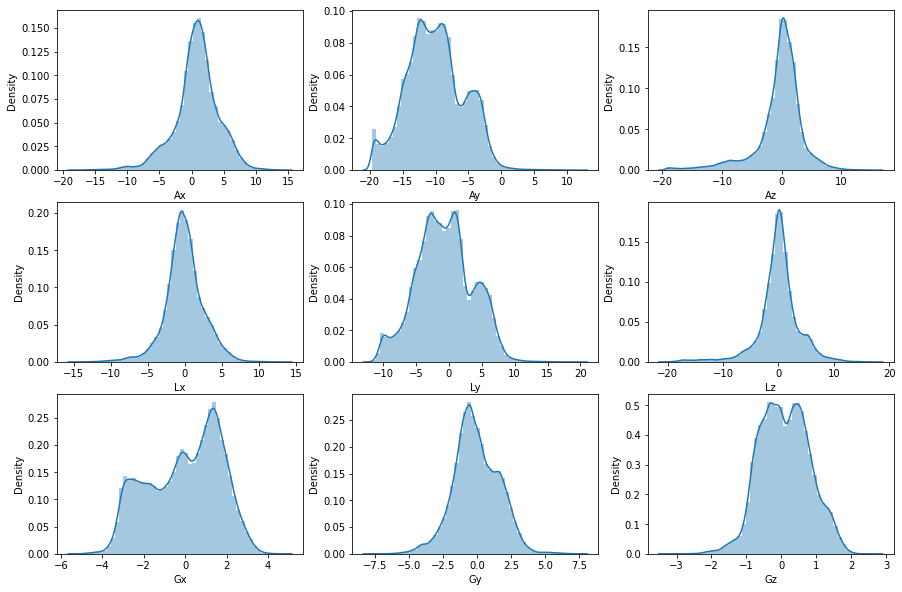

In [ ]:
walking=classwiselist[0]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(1,10):
  # plt.title(df.columns[i])
  sns.distplot(walking[df.columns[i]],ax=ax[int((i-1)/3),j])
  j+=1
  if(j==3):
    j=0
  # plt.show()

In [ ]:
classwiselist[6]

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Unnamed: 13,time_stamp.1,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Activity
54000,1.390000e+12,0.44947,-5.9793,-1.443800,0.020165,3.8101,-1.05270,-1.43830,-1.02960,-0.097128,17.28,29.46,-12.18,NaN,1.390000e+12,1.1441,-10.2830,-2.179300,-0.73702,-0.73860,-3.41590,-0.003665,-1.475900,0.587960,5.22,39.06,-31.08,downstairs
54001,1.390000e+12,0.44947,-5.7886,-1.634400,0.012901,3.9935,-1.09700,-0.90530,-1.16710,-0.219300,17.22,29.52,-11.82,NaN,1.390000e+12,1.5527,-10.3110,-2.043100,-0.23316,-0.73239,-3.15610,-0.392480,-0.459680,0.732430,5.10,39.18,-31.26,downstairs
54002,1.390000e+12,3.56850,-5.8023,0.408610,3.003800,3.9621,1.12220,-0.20067,-1.31730,-0.720210,16.92,29.34,-11.10,NaN,1.390000e+12,1.1032,-11.1550,-1.171300,-0.43120,-1.50060,-1.95060,-1.706100,0.963030,0.987160,4.92,39.36,-30.84,downstairs
54003,1.390000e+12,5.78860,-5.2030,0.476710,5.032000,4.5457,1.22560,-0.18906,-0.41539,-1.326200,16.86,29.46,-10.74,NaN,1.390000e+12,0.9398,-12.1080,-0.204310,-0.46392,-2.41900,-0.76492,-2.934600,2.426700,1.258700,4.80,39.72,-30.60,downstairs
54004,1.390000e+12,3.25530,-6.7012,1.920500,2.217200,3.0181,2.71330,-0.81978,0.54978,-1.261700,16.62,29.58,-10.50,NaN,1.390000e+12,-1.0896,-12.9940,-0.027241,-2.20520,-3.25100,-0.08424,-2.958700,3.324000,0.980740,4.98,40.26,-29.64,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,1.390000e+12,4.23590,-11.7000,-2.301800,1.959100,-2.3493,-4.18680,-0.60292,0.81276,0.028405,-6.96,31.56,14.10,NaN,1.390000e+12,-6.5105,-11.2370,-5.080400,-3.28620,-2.40040,-2.30700,0.114840,-0.140800,-0.030238,-22.92,34.56,11.10,downstairs
62996,1.390000e+12,3.89540,-11.7950,-3.500400,1.599300,-2.4239,-5.25460,-1.83720,1.06230,-0.240990,-7.14,31.56,14.04,NaN,1.390000e+12,-6.8510,-10.0110,-5.407300,-3.83580,-1.81580,-2.62040,-0.184180,-0.324060,0.077580,-23.16,34.80,10.50,downstairs
62997,1.390000e+12,2.90110,-12.1490,-3.187200,0.544980,-2.7078,-4.40220,-2.46910,0.74617,-0.181430,-7.86,31.20,14.34,NaN,1.390000e+12,-5.5707,-10.2970,-4.372100,-2.10350,-1.57210,-1.53930,-0.719600,-0.309400,0.342080,-23.94,35.34,9.48,downstairs
62998,1.390000e+12,2.42440,-11.4960,-1.947700,0.029464,-2.0170,-2.71650,-2.82620,0.46548,-0.091019,-8.16,30.96,14.52,NaN,1.390000e+12,-4.1542,-10.2560,-3.609400,-0.63513,-1.56570,-0.73481,-0.702500,-0.276110,0.301770,-24.24,35.58,9.18,downstairs


## **standing**

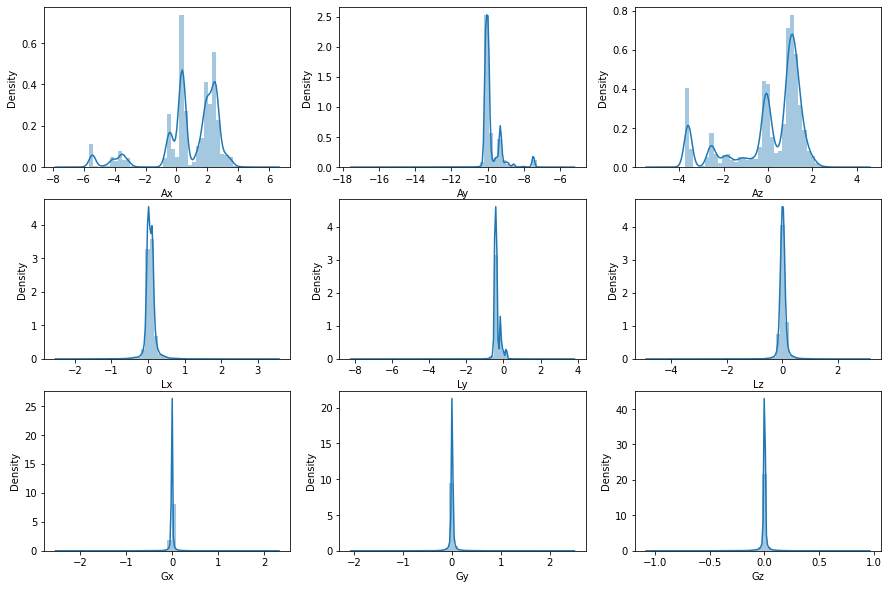

In [ ]:
standing=classwiselist[1]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(1,10):
  # plt.title(df.columns[i])
  sns.distplot(standing[df.columns[i]],ax=ax[int((i-1)/3),j])
  j+=1
  if(j==3):
    j=0
  # plt.show()

## **jogging**

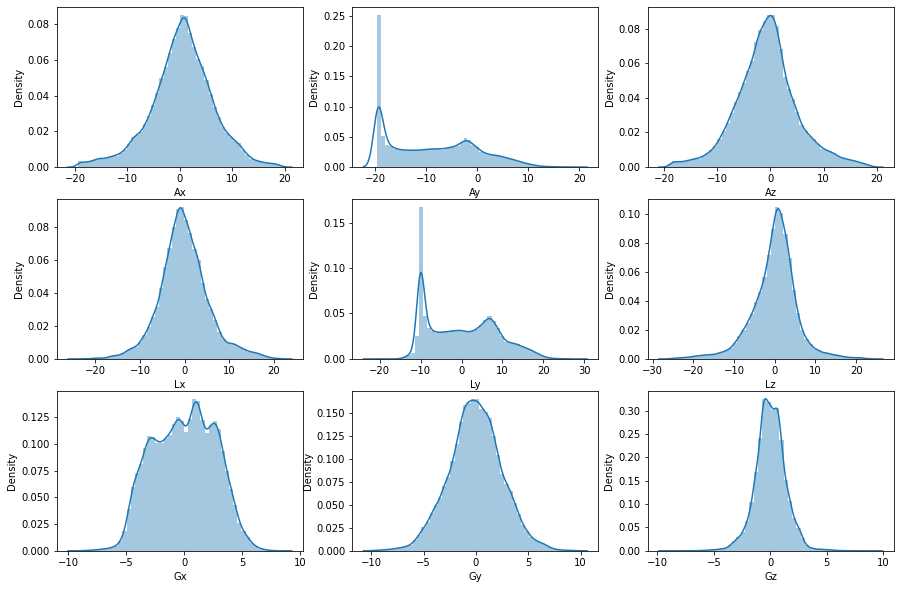

In [ ]:
jogging=classwiselist[2]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(1,10):
  # plt.title(df.columns[i])
  sns.distplot(jogging[df.columns[i]],ax=ax[int((i-1)/3),j])
  j+=1
  if(j==3):
    j=0
  # plt.show()

## **sitting**

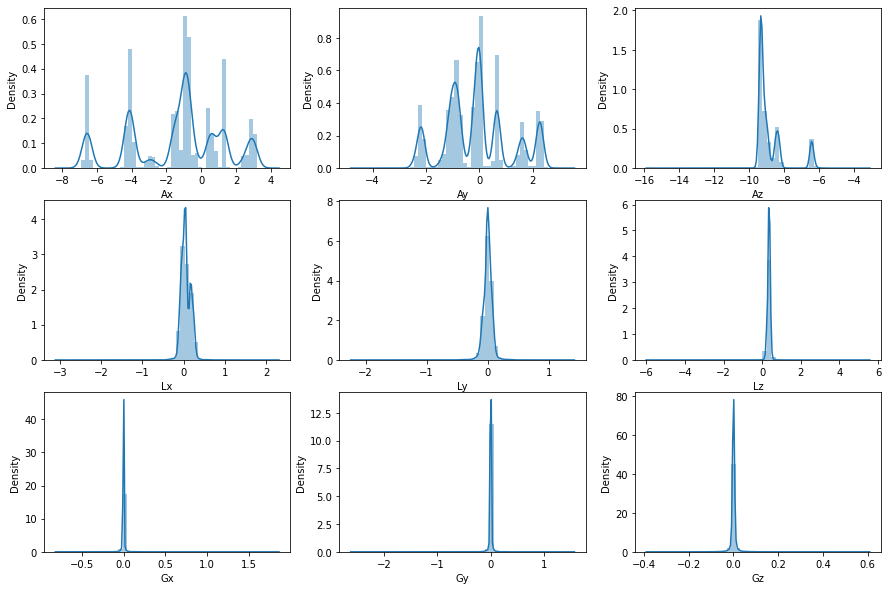

In [ ]:
sitting=classwiselist[3]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(1,10):
  # plt.title(df.columns[i])
  sns.distplot(sitting[df.columns[i]],ax=ax[int((i-1)/3),j])
  j+=1
  if(j==3):
    j=0
  # plt.show()

## **biking**

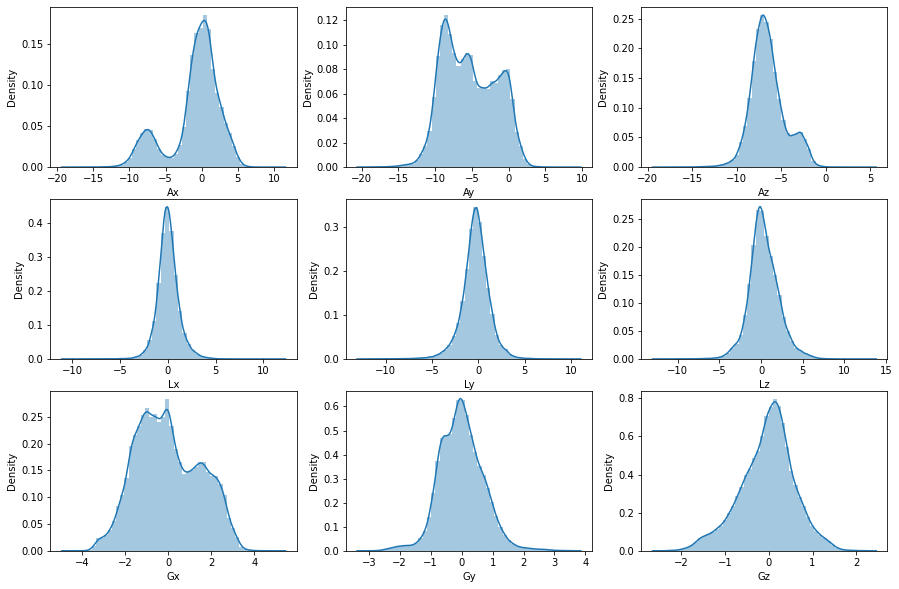

In [ ]:
biking=classwiselist[4]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(1,10):
  # plt.title(df.columns[i])
  sns.distplot(biking[df.columns[i]],ax=ax[int((i-1)/3),j])
  j+=1
  if(j==3):
    j=0
  # plt.show()

## **upstairs**

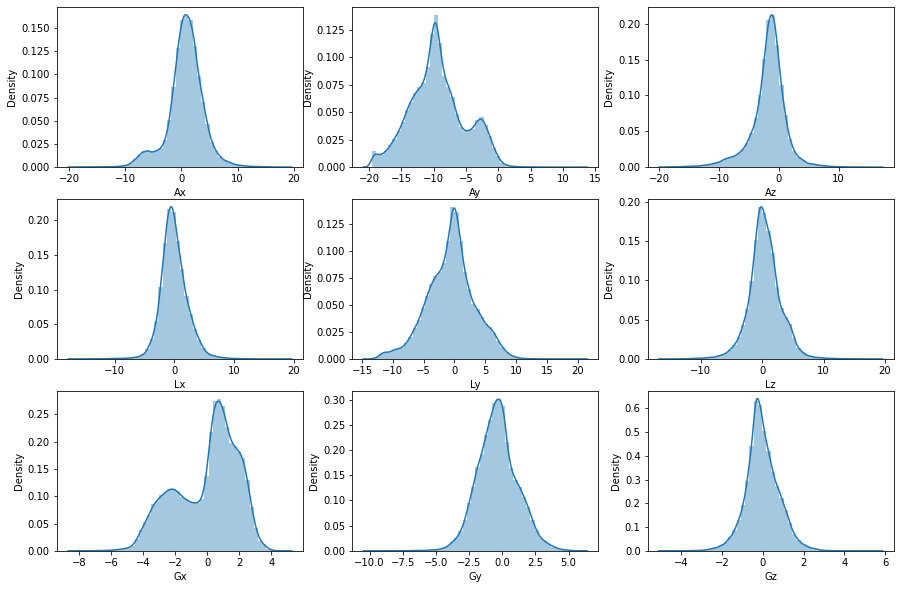

In [ ]:
upstairs=classwiselist[5]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(1,10):
  # plt.title(df.columns[i])
  sns.distplot(upstairs[df.columns[i]],ax=ax[int((i-1)/3),j])
  j+=1
  if(j==3):
    j=0
  # plt.show()

## **downstairs**

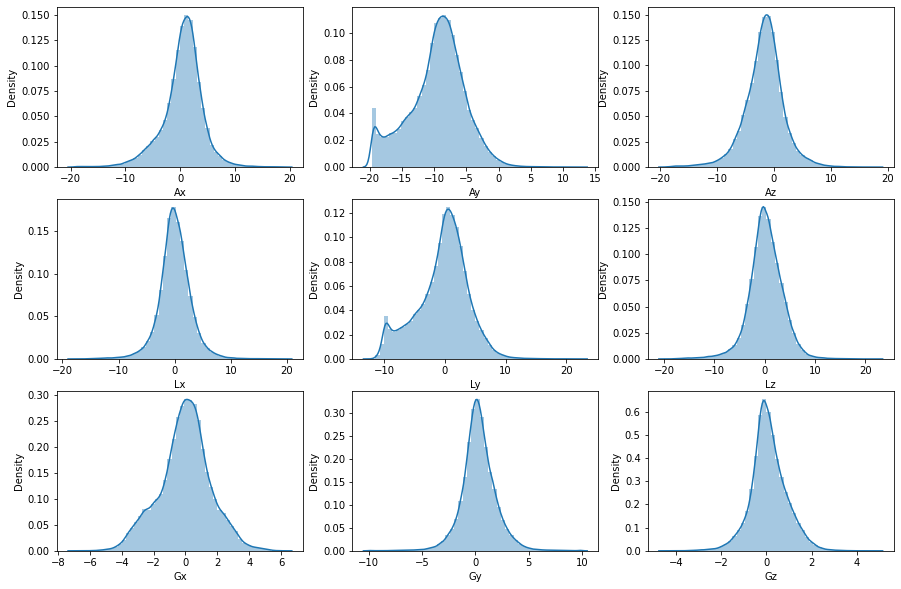

In [ ]:
downstairs=classwiselist[6]
fig,ax=plt.subplots(3,3 ,figsize=(15, 10))
j=0
for i in range(1,10):
  # plt.title(df.columns[i])
  sns.distplot(downstairs[df.columns[i]],ax=ax[int((i-1)/3),j])
  j+=1
  if(j==3):
    j=0
  # plt.show()

# **DEFINING THE FUNCTION FOR PREPROCESSING**

### **SPLITING THE DATASET**

In [ ]:
split_point = int(len(df) * 0.8)
train_data = df.iloc[:split_point, :]
test_data = df.iloc[split_point:, :]

print("Number of train spamples: ", len(train_data))
print("Number of test spamples: ", len(test_data))

Number of train spamples:  504000
Number of test spamples:  126000


In [ ]:
def concat(data):
    left_pocket = data.iloc[:,1:10]
    left_pocket["MA"] = np.sqrt(np.square(left_pocket['Ax']) + np.square(left_pocket['Ay']) + np.square(left_pocket['Az']))
    left_pocket["ML"] = np.sqrt(np.square(left_pocket['Lx']) + np.square(left_pocket['Ly']) + np.square(left_pocket['Lz']))
    left_pocket["MG"] = np.sqrt(np.square(left_pocket['Gx']) + np.square(left_pocket['Gy']) + np.square(left_pocket['Gz']))
    
    right_pocket = data.iloc[:,15:24]
    right_pocket.columns=['Ax', 'Ay', 'Az', 'Lx', 'Ly', 'Lz', 'Gx', 'Gy', 'Gz']
    
    right_pocket["MA"] = np.sqrt(np.square(right_pocket['Ax']) + np.square(right_pocket['Ay']) + np.square(right_pocket['Az']))
    right_pocket["ML"] = np.sqrt(np.square(right_pocket['Lx']) + np.square(right_pocket['Ly']) + np.square(right_pocket['Lz']))
    right_pocket["MG"] = np.sqrt(np.square(right_pocket['Gx']) + np.square(right_pocket['Gy']) + np.square(right_pocket['Gz']))

    labels = data.iloc[:, 27] 
    labels = labels.to_frame()
    labels.columns=['Activity_Label']
    labels = pd.concat([labels]*2, ignore_index=True)

    frames = [left_pocket, right_pocket]
    df = pd.concat(frames)
   
    return df, labels
    return df, labels

def generate_sequence(x, y, n_time_steps, step):
    segments = []
    labels = []
    for i in range(0, len(x) - n_time_steps, step):
        ax = x['Ax'].values[i: i + n_time_steps]
        ay = x['Ay'].values[i: i + n_time_steps]
        az = x['Az'].values[i: i + n_time_steps]

        lx = x['Lx'].values[i: i + n_time_steps]
        ly = x['Ly'].values[i: i + n_time_steps]
        lz = x['Lz'].values[i: i + n_time_steps]
        
        gx = x['Gx'].values[i: i + n_time_steps]
        gy = x['Gy'].values[i: i + n_time_steps]
        gz = x['Gz'].values[i: i + n_time_steps]

        MA = x['MA'].values[i: i + n_time_steps]
        ML = x['ML'].values[i: i + n_time_steps]
        MG = x['MG'].values[i: i + n_time_steps]
       
        label = stats.mode(y['Activity_Label'][i: i + n_time_steps])[0][0]
        segments.append([ax, ay, az, lx, ly, lz, gx, gy, gz, MA, ML, MG])
        labels.append(label)
        
    return segments, labels

def reshape_segments(x, y, n_time_steps, n_features):
    x_reshaped = np.asarray(x, dtype= np.float32).reshape(-1, n_time_steps, n_features)
    y_reshaped = np.asarray(pd.get_dummies(y), dtype = np.float32)
    return x_reshaped, y_reshaped

In [ ]:
train_X, train_y = concat(train_data)
test_X, test_y = concat(test_data)

In [ ]:
train_X.head(3)

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,MA,ML,MG
0,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976,15.043465,5.302856,3.239893
1,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745,14.097451,4.357177,1.859419
2,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230,14.744242,4.971531,1.127458


In [ ]:
train_y.head(3)

,Activity_Label
0,walking
1,walking
2,walking


In [ ]:
N_TIME_STEPS = 100
STEP = 50 
N_FEATURES = 12 

In [ ]:
train_X, train_y = generate_sequence(train_X, train_y, N_TIME_STEPS, STEP)
test_X, test_y = generate_sequence(test_X, test_y, N_TIME_STEPS, STEP)

In [ ]:
set(train_y)

{'biking',
 'downstairs',
 'jogging',
 'sitting',
 'standing',
 'upstairs',
 'walking'}

In [ ]:
X_train, y_train = reshape_segments(train_X, train_y, N_TIME_STEPS, N_FEATURES)
X_test, y_test = reshape_segments(test_X, test_y, N_TIME_STEPS, N_FEATURES)

# **BUILDING THE MODEL**

In [ ]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from tensorflow.keras import optimizers

N_CLASSES = 7
N_HIDDEN_UNITS = 32
L2 = 0.000001

model = Sequential([
    LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
         kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
         bias_regularizer=l2(L2), name="LSTM_1"),
    Flatten(name='Flatten'),
    Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"),
    Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2")
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, 100, 32)           5760      
                                                                 
 Flatten (Flatten)           (None, 3200)              0         
                                                                 
 Dense_1 (Dense)             (None, 32)                102432    
                                                                 
 Dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 108,423
Trainable params: 108,423
Non-trainable params: 0
_________________________________________________________________


# **FITTING & EVALUATION**

In [ ]:
opt = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

BATCH_SIZE = 1024
N_EPOCHS = 30

model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=N_EPOCHS,
          validation_data=(X_test, y_test))

Epoch 1/30
20/20 [==============================] - 8s 314ms/step - loss: 1.5142 - accuracy: 0.5347 - val_loss: 1.2493 - val_accuracy: 0.6830
Epoch 2/30
20/20 [==============================] - 6s 285ms/step - loss: 1.0005 - accuracy: 0.8213 - val_loss: 0.8859 - val_accuracy: 0.8609
Epoch 3/30
20/20 [==============================] - 6s 284ms/step - loss: 0.7003 - accuracy: 0.9030 - val_loss: 0.6532 - val_accuracy: 0.9119
Epoch 4/30
20/20 [==============================] - 6s 289ms/step - loss: 0.5060 - accuracy: 0.9297 - val_loss: 0.4991 - val_accuracy: 0.9301
Epoch 5/30
20/20 [==============================] - 6s 288ms/step - loss: 0.3777 - accuracy: 0.9461 - val_loss: 0.3842 - val_accuracy: 0.9516
Epoch 6/30
20/20 [==============================] - 6s 283ms/step - loss: 0.2899 - accuracy: 0.9561 - val_loss: 0.3052 - val_accuracy: 0.9559
Epoch 7/30
20/20 [==============================] - 6s 288ms/step - loss: 0.2297 - accuracy: 0.9613 - val_loss: 0.2493 - val_accuracy: 0.9633
Epoch 

# **SAVING THE MODEL**

In [ ]:
model.save("keras_model.h5")

In [ ]:
model.predict(X_train)

array([[2.79102181e-07, 3.36444564e-03, 3.50800082e-02, ...,
        4.86565623e-05, 7.94747844e-04, 9.60711837e-01],
       [6.69767575e-09, 1.34451396e-03, 1.29683968e-03, ...,
        9.69107168e-06, 1.82432359e-05, 9.97330666e-01],
       [3.03212140e-08, 2.84764869e-03, 7.03910515e-02, ...,
        1.71809716e-05, 2.45942181e-04, 9.26498055e-01],
       ...,
       [1.05845096e-07, 9.93886292e-01, 2.19001714e-03, ...,
        2.69304655e-05, 1.83162090e-04, 3.71353980e-03],
       [1.20977276e-07, 9.78476703e-01, 1.32576646e-02, ...,
        1.40835664e-05, 1.48627252e-04, 8.10260139e-03],
       [2.64139175e-07, 9.33789253e-01, 3.57209444e-02, ...,
        4.70487139e-05, 3.44652659e-03, 2.69957967e-02]], dtype=float32)